Name: Gauri Kailas Bankar (BE_A_66)

---
# **Problem Statement**
Given a bank customer, build a neural network-based classifier that can determine whether 
they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle.
The dataset contains 10,000 sample points with 14 distinct features such as
CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

Link to the Kaggle project:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data. 
4. Initialize and build the model. Identify the points of improvement and implement the same. 
5. Print the accuracy score and confusion matrix (5 points).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the dataset.

In [2]:
bank_data = pd.read_csv('Churn_Modelling.csv')

In [3]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
bank_data_new = bank_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)

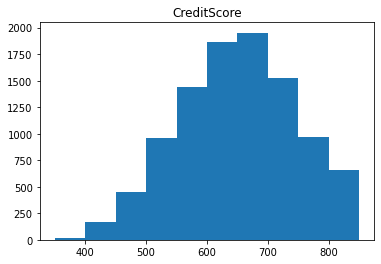

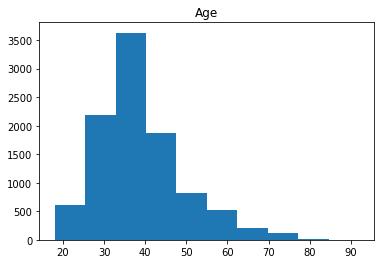

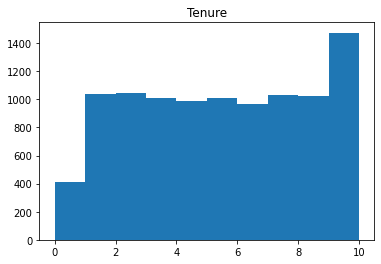

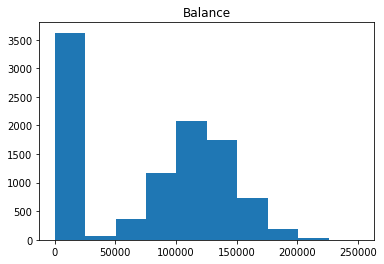

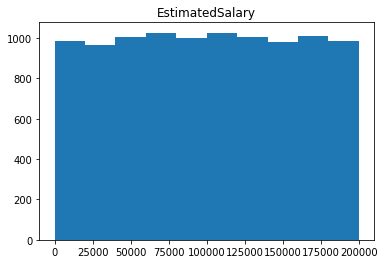

In [7]:
numerical_distribution = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for i in numerical_distribution:
    plt.hist(bank_data_new[i])
    plt.title(i)
    plt.show()

In [8]:
bank_data_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Distinguish the feature and target set and divide the data set into training and test sets.

In [9]:
#splitting data into features and target variable
X = bank_data_new.iloc[:,:-1].values
Y = bank_data_new.iloc[:,-1].values

## 3. Normalize the train and test data.

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Geography- country
labelEncoder_X_1 = LabelEncoder()
X[:, 1]= labelEncoder_X_1.fit_transform(X[:, 1])

#Gender
labelEncoder_X_2 = LabelEncoder()
X[:, 2] = labelEncoder_X_2.fit_transform(X[:, 2])

In [11]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [12]:
#Giving ordinal feature to our variables.
from sklearn.compose import ColumnTransformer
oneHotEncoder = ColumnTransformer([("Country", OneHotEncoder(),[1])], remainder='passthrough')
X = oneHotEncoder.fit_transform(X)

In [13]:
#We need to omit one of the columns to avoid the dummy variable trap.
X = X[:, 1:]

#take a look at X now.
X

array([[0.0, 0.0, 619, ..., 1, 1, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0, 38190.78]], dtype=object)

In [14]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state= 42)

In [15]:
#feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 4. Initialize and build the model. Identify the points of improvement and implement the same.

In [16]:
#Using sequential model using Keras
import keras
from keras.models import Sequential   # to initalize NN
from keras.layers import Dense        # used to create layers in NN

# Using TensorFlow backend.

In [17]:
#building ANN classifier

classifier = Sequential()

#adding first layer(input layer)
classifier.add(Dense(units=6, kernel_initializer='uniform', input_dim=11, 
                     activation='relu'))

#adding second layer(hidden layer)
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

#adding third layer(output layer)
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

#compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train the ANN
classifier.fit(X_train, Y_train, batch_size=10, epochs=100)

Epoch 1/100
800/800 [==============================] - 3s 2ms/step - loss: 0.4819 - accuracy: 0.7970
Epoch 2/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4150 - accuracy: 0.8259
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3993 - accuracy: 0.8291
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3883 - accuracy: 0.8289
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3813 - accuracy: 0.8331
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3758 - accuracy: 0.8397
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3719 - accuracy: 0.8455
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3681 - accuracy: 0.8465
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3671 - accuracy: 0.8509
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3639 - accura

In [18]:
Y_pred = classifier.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [19]:
Y_pred = (Y_pred > 0.5)

In [20]:
Y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

## 5. Print the accuracy score and confusion matrix.

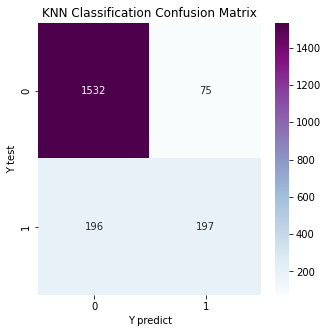

In [21]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

svmclassifier_cm = confusion_matrix(Y_test, Y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmclassifier_cm, annot=True, fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [22]:
from sklearn.metrics import accuracy_score
print("Accuracy Score : ", accuracy_score(Y_pred,Y_test))

Accuracy Score :  0.8645
